# Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

pd.options.display.float_format = '{:,.2f}'.format

pd.set_option('display.max_columns',999)

# Importing Online Store Data second sheet

In [3]:
df = pd.read_excel('online_retail_II.xlsx', sheet_name=1)

# Exploratory Data Analyses 'EDA'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
# Check the number of products sold and total Quantities and Income per Product

dfby_description = df.groupby('Description',as_index=False)[['Quantity','Price']].sum()

In [6]:
# Sort the data by Quantity

dfby_description.sort_values(by='Quantity',ascending=False)

,Description,Quantity,Price
4009,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847,173.39
1866,JUMBO BAG RED RETROSPOT,47363,"5,333.30"
244,ASSORTED COLOUR BIRD ORNAMENT,36381,"2,584.77"
2740,POPCORN HOLDER,36334,874.50
2395,PACK OF 72 RETROSPOT CAKE CASES,36039,"1,047.04"
...,...,...,...
1123,Damaged,-7540,0.00
2796,Printing smudges/thrown away,-9058,0.00
4116,check,-12030,0.00
3740,"Unsaleable, destroyed.",-15644,0.00


In [7]:
# Check the negative Prices

df[df['Price']<=0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1510,536545,21134,NaN,1,2010-12-01 14:32:00,0.00,NaN,United Kingdom
1985,536547,37509,NaN,1,2010-12-01 14:33:00,0.00,NaN,United Kingdom
1986,536546,22145,NaN,1,2010-12-01 14:33:00,0.00,NaN,United Kingdom
2022,536552,20950,NaN,1,2010-12-01 14:34:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.00,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.00,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.00,NaN,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.00,NaN,United Kingdom


In [8]:
# Check the negative Quantities

df[df['Quantity']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,"14,527.00",United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,"15,311.00",United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,"17,548.00",United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,"17,548.00",United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,"17,548.00",United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,"14,397.00",United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,"15,498.00",United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,"15,311.00",United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,"17,315.00",United Kingdom


In [9]:
# Change data type of Invoice culumn to String

df['Invoice']= df['Invoice'].astype(str)

In [10]:
#check the negative quantities that does not belong to Cancelation orders

df[(~df['Invoice'].str.contains('^C')) & (df['Quantity']<0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.00,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.00,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.00,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.00,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.00,NaN,United Kingdom
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.00,NaN,United Kingdom
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.00,NaN,United Kingdom
536910,581226,23090,missing,-338,2011-12-08 09:56:00,0.00,NaN,United Kingdom


In [11]:
#check the negative quantities that belong to Cancelation orders

df[(df['Invoice'].str.contains('^C')) & (df['Quantity']<0)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,"14,527.00",United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,"15,311.00",United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,"17,548.00",United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,"17,548.00",United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,"17,548.00",United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,"14,397.00",United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,"15,498.00",United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,"15,311.00",United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,"17,315.00",United Kingdom


In [12]:
#check the description of negative quantities that doesn't belong to Cancelation orders

df[(~df['Invoice'].str.contains('^C')) & (df['Quantity']<0)]['Description'].unique()

array([nan, '?', 'check', 'damages', 'faulty', 'Dotcom sales',
       'reverse 21/5/10 adjustment', 'mouldy, thrown away.', 'counted',
       'Given away', 'Dotcom', 'label mix up', 'samples/damages',
       'thrown away', 'incorrectly made-thrown away.', 'showroom', 'MIA',
       'Dotcom set', 'wrongly sold as sets', 'dotcom sold sets',
       'Amazon sold sets', 'wrongly sold sets', '?sold as sets?',
       '? sold as sets?', 'Thrown away.', 'damages/display',
       'damaged stock', 'broken', 'throw away', 'wrong barcode (22467)',
       'wrong barcode', 'barcode problem', '?lost',
       "thrown away-can't sell.", "thrown away-can't sell", 'damages?',
       're dotcom quick fix.', "Dotcom sold in 6's", 'sold in set?',
       'cracked', 'sold as 22467', 'Damaged',
       'mystery! Only ever imported 1800',
       'MERCHANT CHANDLER CREDIT ERROR, STO', 'POSSIBLE DAMAGES OR LOST?',
       'damaged', 'DAMAGED', 'Display', 'Missing', 'wrong code?',
       'wrong code', 'adjust', 'crush

# Data Cleaning 

In [38]:
# Make a copy of the data
df_copy= df.copy()

In [39]:
# Keeping Positive Quantities only
df_copy = df_copy[df_copy['Quantity']>0]

In [40]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531286 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      531286 non-null  object        
 1   StockCode    531286 non-null  object        
 2   Description  530694 non-null  object        
 3   Quantity     531286 non-null  int64         
 4   InvoiceDate  531286 non-null  datetime64[ns]
 5   Price        531286 non-null  float64       
 6   Customer ID  397925 non-null  float64       
 7   Country      531286 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.5+ MB


In [41]:
# Keeping Positive Prices only

df_copy=df_copy[df_copy['Price']>0]

In [42]:
len(df_copy)

530105

In [43]:
# Keep NON Null Customer IDs

df_copy= df_copy[df_copy['Customer ID'].notnull()]

In [44]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397885 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      397885 non-null  object        
 1   StockCode    397885 non-null  object        
 2   Description  397885 non-null  object        
 3   Quantity     397885 non-null  int64         
 4   InvoiceDate  397885 non-null  datetime64[ns]
 5   Price        397885 non-null  float64       
 6   Customer ID  397885 non-null  float64       
 7   Country      397885 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [45]:
# check products Descritions that doesn't follow data insraction in manual

df_copy[(df_copy["StockCode"].str.match("^\\d{5}$") == False) & (df_copy["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'], dtype=object)

In [46]:
len(df_copy)

397885

In [47]:
df_copy[(df_copy["StockCode"].str.contains("^POST$|^C2$|^M$|^BANK CHARGES$|^PADS$|^DOT$")==True)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,"12,583.00",France
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,"12,791.00",Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,"12,662.00",Germany
1423,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.00,"14,911.00",EIRE
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,"16,274.00",United Kingdom
...,...,...,...,...,...,...,...,...
541216,581494,POST,POSTAGE,2,2011-12-09 10:13:00,18.00,"12,518.00",Germany
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,"12,662.00",Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,"12,526.00",Germany
541768,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.00,"12,713.00",Germany


In [48]:
# Filter the Data by its manuel instraction 

df_copy["StockCode"] = df_copy["StockCode"].astype("str")

mask=(
     (df_copy["StockCode"].str.match("^\\d{5}$") == True)
    |(df_copy["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")== True)
   )

df_copy = df_copy[mask]

In [49]:
#Calculate the percentage of Droped Data

droped_data = (len(df)-len(df_copy))/len(df)*100
print(f'We droped {droped_data:.2f}% of the Data')

We droped 26.86% of the Data


In [50]:
df_copy.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,"17,850.00",United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,"17,850.00",United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,"17,850.00",United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,"17,850.00",United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,"17,850.00",United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,"17,850.00",United Kingdom
9,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,"13,047.00",United Kingdom


# Prepare the data for Customers RFM Analyses 

### Calculate the Recency, Frequency qnd the monetary value for each customer

In [51]:
# Group the data frame by Customers and check Quantity and spending for each Customer

df_copy.groupby('Customer ID',as_index=False)[['Price','Quantity']].sum()

,Customer ID,Price,Quantity
0,"12,346.00",1.04,74215
1,"12,347.00",481.21,2458
2,"12,348.00",18.71,2332
3,"12,349.00",305.10,630
4,"12,350.00",25.30,196
...,...,...,...
4329,"18,280.00",47.65,45
4330,"18,281.00",39.36,54
4331,"18,282.00",62.39,103
4332,"18,283.00","1,214.98",1395


In [52]:
# Calculate the number of product in the data

df_copy['Description'].nunique()

3871

In [53]:
# Calculate total spending per Invoice

df_copy['Total per Invoice'] = df_copy['Quantity']*df_copy['Price']

In [54]:
df_copy.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total per Invoice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,"17,850.00",United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,"17,850.00",United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom,20.34


In [55]:
# Create DataFrame for Customers RFM 

df_group = df_copy.groupby('Customer ID',as_index=False)\
.agg(
    
    MonetaryValue = ('Total per Invoice','sum'),
    Frequency = ('Invoice','nunique'),
    LatestInvoice = ('InvoiceDate','max'),
    
)

In [56]:
# since we are dealing with old data we assumed that the latest invoice is the recent time

lastday= df_copy['InvoiceDate'].max()
lastday

Timestamp('2011-12-09 12:50:00')

In [57]:
#add Recency Culumn by calculate the deference between the invoice date and the date we assumed is the recent one

df_group['Recency'] = (lastday - df_group['LatestInvoice']).dt.days

In [58]:
#take a look on our dataframe
df_group

,Customer ID,MonetaryValue,Frequency,LatestInvoice,Recency
0,"12,346.00","77,183.60",1,2011-01-18 10:01:00,325
1,"12,347.00","4,310.00",7,2011-12-07 15:52:00,1
2,"12,348.00","1,437.24",4,2011-09-25 13:13:00,74
3,"12,349.00","1,457.55",1,2011-11-21 09:51:00,18
4,"12,350.00",294.40,1,2011-02-02 16:01:00,309
...,...,...,...,...,...
4329,"18,280.00",180.60,1,2011-03-07 09:52:00,277
4330,"18,281.00",80.82,1,2011-06-12 10:53:00,180
4331,"18,282.00",178.05,2,2011-12-02 11:43:00,7
4332,"18,283.00","2,088.93",16,2011-12-06 12:02:00,3


In [59]:
# Create a top 10 products by total of incomes 

df_gproduct = df_copy.groupby('Description',as_index=False)\
.agg(
    
    TotalQuantity = ('Quantity','sum'),
    TotalIncome = ('Total per Invoice','sum'),
    Totalinvoice = ('Invoice','nunique'),
)

In [66]:
# Sort the data by highest income

df_gproduct.sort_values(by='TotalIncome',ascending=False).head(10)

,Description,TotalQuantity,TotalIncome,Totalinvoice
2314,"PAPER CRAFT , LITTLE BIRDIE",80995,"168,469.60",1
2761,REGENCY CAKESTAND 3 TIER,12402,"142,592.95",1703
3692,WHITE HANGING HEART T-LIGHT HOLDER,36725,"100,448.15",1971
1759,JUMBO BAG RED RETROSPOT,46181,"85,220.78",1600
1989,MEDIUM CERAMIC TOP STORAGE JAR,77916,"81,416.73",195
2340,PARTY BUNTING,15291,"68,844.33",1379
216,ASSORTED COLOUR BIRD ORNAMENT,35362,"56,580.34",1375
2650,RABBIT NIGHT LIGHT,27202,"51,346.20",801
720,CHILLI LIGHTS,9650,"46,286.51",519
2308,PAPER CHAIN KIT 50'S CHRISTMAS,15617,"42,660.83",980


In [79]:
# Create a top 10 Country by total of incomes 

dfc_Top10 = df_copy.groupby('Country',as_index=False)\
.agg(
    
    TotalQuantity = ('Quantity','sum'),
    TotalIncome = ('Total per Invoice','sum'),
    TotalCustomers = ('Customer ID','nunique'),
)

In [80]:
dfc_Top10=dfc_Top10.sort_values(by='TotalIncome',ascending=False).head(10)

In [69]:
dfc_Top10.head(10)

,Country,TotalQuantity,TotalIncome,TotalCustomers
35,United Kingdom,4249507,"7,265,862.23",3916
14,Germany,118139,"205,569.89",94
13,France,110637,"183,891.68",87
30,Spain,27731,"55,725.11",30
32,Switzerland,29980,"52,441.95",21
3,Belgium,22962,"36,927.34",25
26,Portugal,16017,"26,707.95",19
12,Finland,10608,"18,344.88",12
18,Italy,8067,"15,820.24",14
1,Austria,4844,"8,742.68",11


In [35]:
costpercon = df_copy.groupby('Customer ID')['Country'].nunique()

In [40]:
costpercon = costpercon[costpercon>1]

In [41]:
costpercon = df_copy[df_copy['Customer ID'].isin(costpercon.index)]

In [42]:
costpercon.groupby('Customer ID',as_index=False)[('Invoice')].count()

,Customer ID,Invoice
0,"12,370.00",166
1,"12,394.00",25
2,"12,417.00",183
3,"12,422.00",38
4,"12,429.00",94
5,"12,431.00",233
6,"12,455.00",85
7,"12,457.00",59


# Visualisation for RFM DataFrame

In [84]:
df_customers = df_group

In [85]:
df_customers.head()

,Customer ID,MonetaryValue,Frequency,LatestInvoice,Recency
0,"12,346.00","77,183.60",1,2011-01-18 10:01:00,325
1,"12,347.00","4,310.00",7,2011-12-07 15:52:00,1
2,"12,348.00","1,437.24",4,2011-09-25 13:13:00,74
3,"12,349.00","1,457.55",1,2011-11-21 09:51:00,18
4,"12,350.00",294.40,1,2011-02-02 16:01:00,309


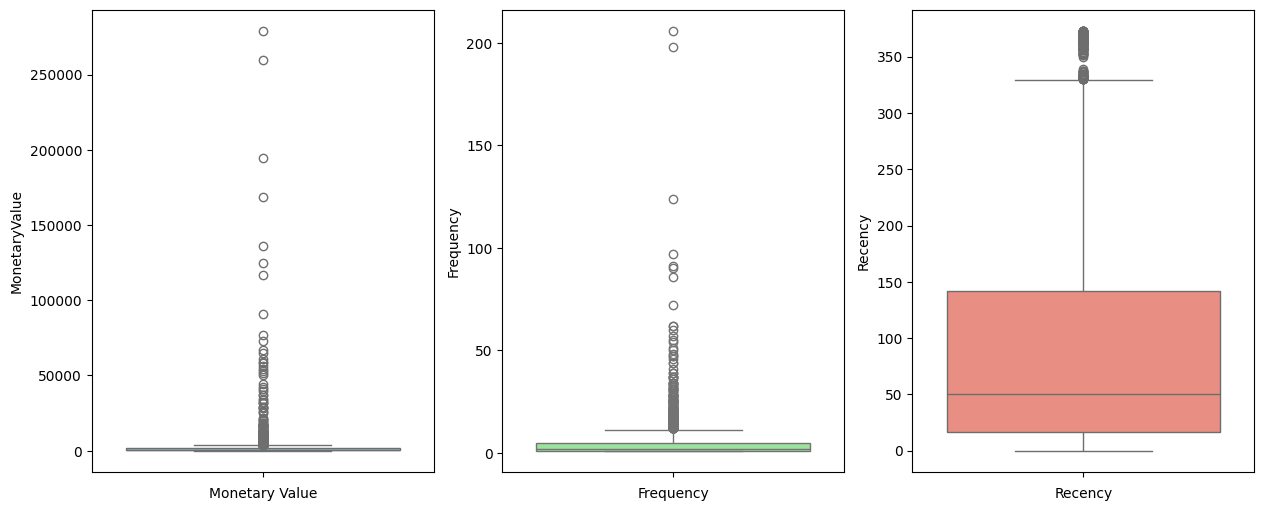

In [87]:
# Box Plot for RFM

plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.boxplot(data= (df_customers['MonetaryValue']),color='skyblue')
plt.xlabel('Monetary Value')

plt.subplot(1,3,2)
sns.boxplot(data= df_customers['Frequency'],color='lightgreen')
plt.xlabel('Frequency')

plt.subplot(1,3,3)
sns.boxplot(data= df_customers['Recency'],color= 'salmon')
plt.xlabel('Recency')

plt.show()

In [88]:
# Calculate the Monetary and Frequency Quantile to seperate outliares from the DataFrame

MQ_1 = df_customers['MonetaryValue'].quantile(.25)
MQ_3 = df_customers['MonetaryValue'].quantile(.75)
MIQ = MQ_3 - MQ_1

FQ_1 = df_customers['Frequency'].quantile(.25)
FQ_3 = df_customers['Frequency'].quantile(.75)
FIQ = FQ_3 - FQ_1

In [91]:
# Identify Monetary Outliars

monetary_outliars = df_customers[(df_customers['MonetaryValue']>(MQ_3+1.5*MIQ))|(df_customers['MonetaryValue']<(MQ_1 - 1.5 * MIQ))]

In [92]:
monetary_outliars.head()

,Customer ID,MonetaryValue,Frequency,LatestInvoice,Recency
0,"12,346.00","77,183.60",1,2011-01-18 10:01:00,325
1,"12,347.00","4,310.00",7,2011-12-07 15:52:00,1
10,"12,357.00","6,207.67",1,2011-11-06 16:07:00,32
12,"12,359.00","6,372.58",4,2011-10-13 12:47:00,57
15,"12,362.00","4,737.23",10,2011-12-06 15:40:00,2


In [93]:
# Identify Frequency Outliars

frequency_outliars = df_customers[(df_customers['Frequency']>(FQ_3 + 1.5 * FIQ))| (df_customers['Frequency']<(FQ_1 - 1.5*FIQ))]

In [94]:
frequency_outliars.describe()

,Customer ID,MonetaryValue,Frequency,Recency
count,278.00,278.00,278.00,278.00
mean,"15,355.67","14,488.01",23.09,13.17
std,"1,745.00","30,142.78",21.17,30.37
min,"12,395.00","1,296.44",12.00,0.00
25%,"13,880.25","4,197.77",13.00,2.00
50%,"15,290.50","6,283.52",17.00,5.50
75%,"16,781.25","11,040.84",25.00,15.00
max,"18,283.00","279,138.02",206.00,371.00


In [95]:
# Keep Non Outliars DataFrame only

non_outliar_cdf = df_customers[(~df_customers.index.isin(monetary_outliars.index)) & (~df_customers.index.isin(frequency_outliars.index))]

In [96]:
non_outliar_cdf.describe()

,Customer ID,MonetaryValue,Frequency,Recency
count,"3,863.00","3,863.00","3,863.00","3,863.00"
mean,"15,323.85",853.81,2.76,99.94
std,"1,709.73",794.61,2.17,101.87
min,"12,348.00",3.75,1.00,0.00
25%,"13,850.50",278.50,1.00,21.00
50%,"15,333.00",570.46,2.00,58.00
75%,"16,798.00","1,187.01",4.00,160.00
max,"18,287.00","3,619.17",11.00,373.00


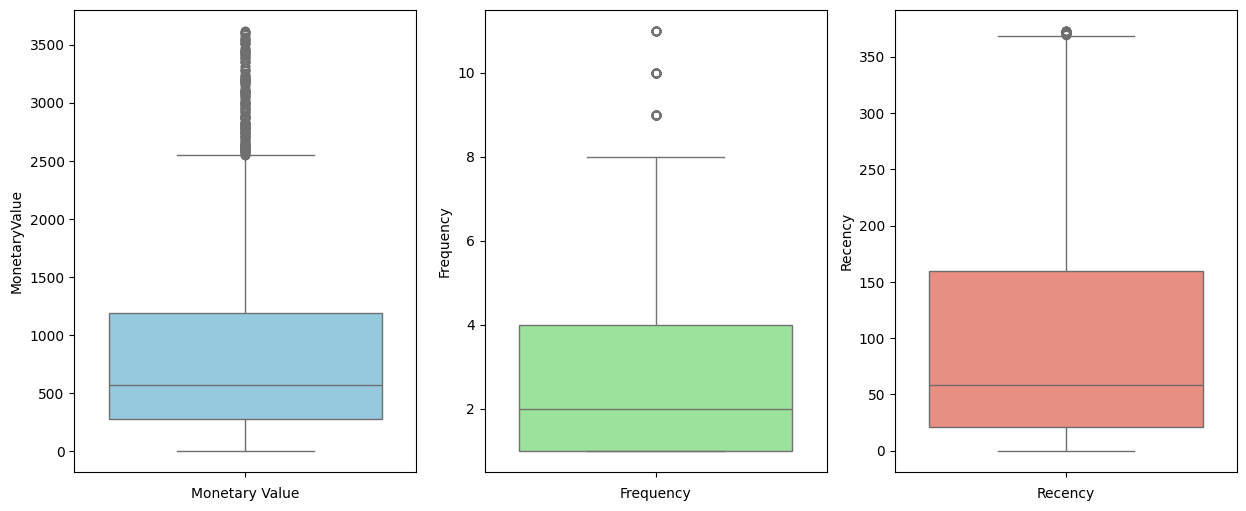

In [97]:
# Box Plot for RFM Non outliars DataFrame

plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.boxplot(data= (non_outliar_cdf['MonetaryValue']),color='skyblue')
plt.xlabel('Monetary Value')

plt.subplot(1,3,2)
sns.boxplot(data= non_outliar_cdf['Frequency'],color='lightgreen')
plt.xlabel('Frequency')

plt.subplot(1,3,3)
sns.boxplot(data= non_outliar_cdf['Recency'],color= 'salmon')
plt.xlabel('Recency')

plt.show()

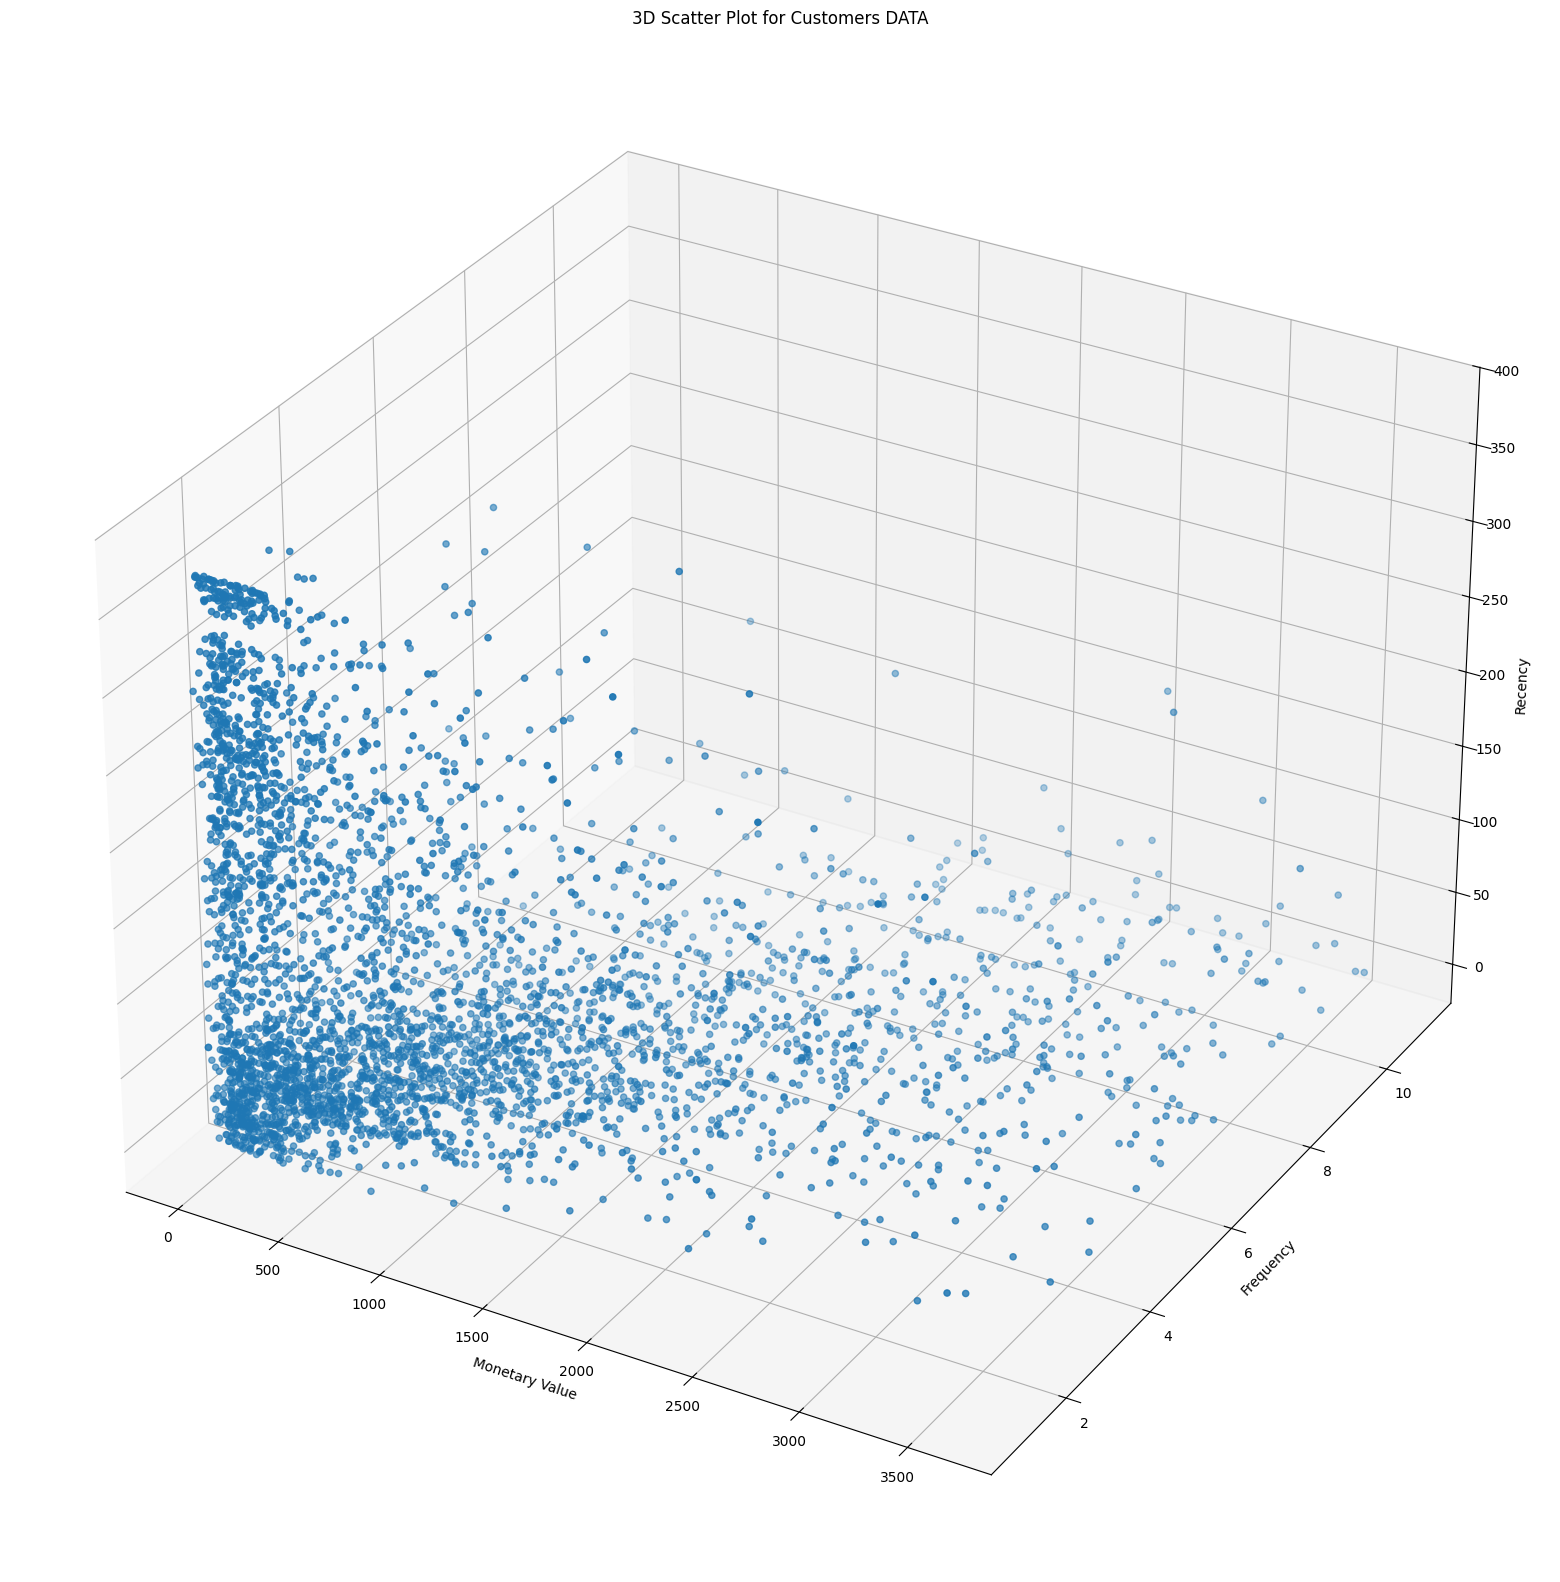

In [99]:
# 3D Scatter Plot for Customers RFM

fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(projection = '3d')

scatter = ax.scatter(non_outliar_cdf['MonetaryValue'],non_outliar_cdf['Frequency'],non_outliar_cdf['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot for Customers DATA')

plt.show()



In [101]:
# Transform non outliar data with Standarded Scaler to mesure the data with same scale

standar = StandardScaler()

scaled_data= standar.fit_transform(non_outliar_cdf[['MonetaryValue','Frequency','Recency']])

In [102]:
scaled_data

array([[ 0.73432565,  0.57425162, -0.25471707],
       [ 0.75988873, -0.8096124 , -0.80452635],
       [-0.70410412, -0.8096124 ,  2.05251827],
       ...,
       [-0.97292551, -0.8096124 ,  0.78599334],
       [-0.85054746, -0.34832439, -0.9125246 ],
       [ 1.23783397,  0.11296362, -0.5688938 ]])

In [103]:
# Converte the data from array to data frame

scaled_data_df = pd.DataFrame(scaled_data, index= non_outliar_cdf.index, columns = ('MonetaryValue','Frequency','Recency'))

In [105]:
scaled_data_df.head()

,MonetaryValue,Frequency,Recency
2,0.73,0.57,-0.25
3,0.76,-0.81,-0.80
4,-0.70,-0.81,2.05
5,0.67,1.96,-0.64
6,-0.96,-0.81,1.01


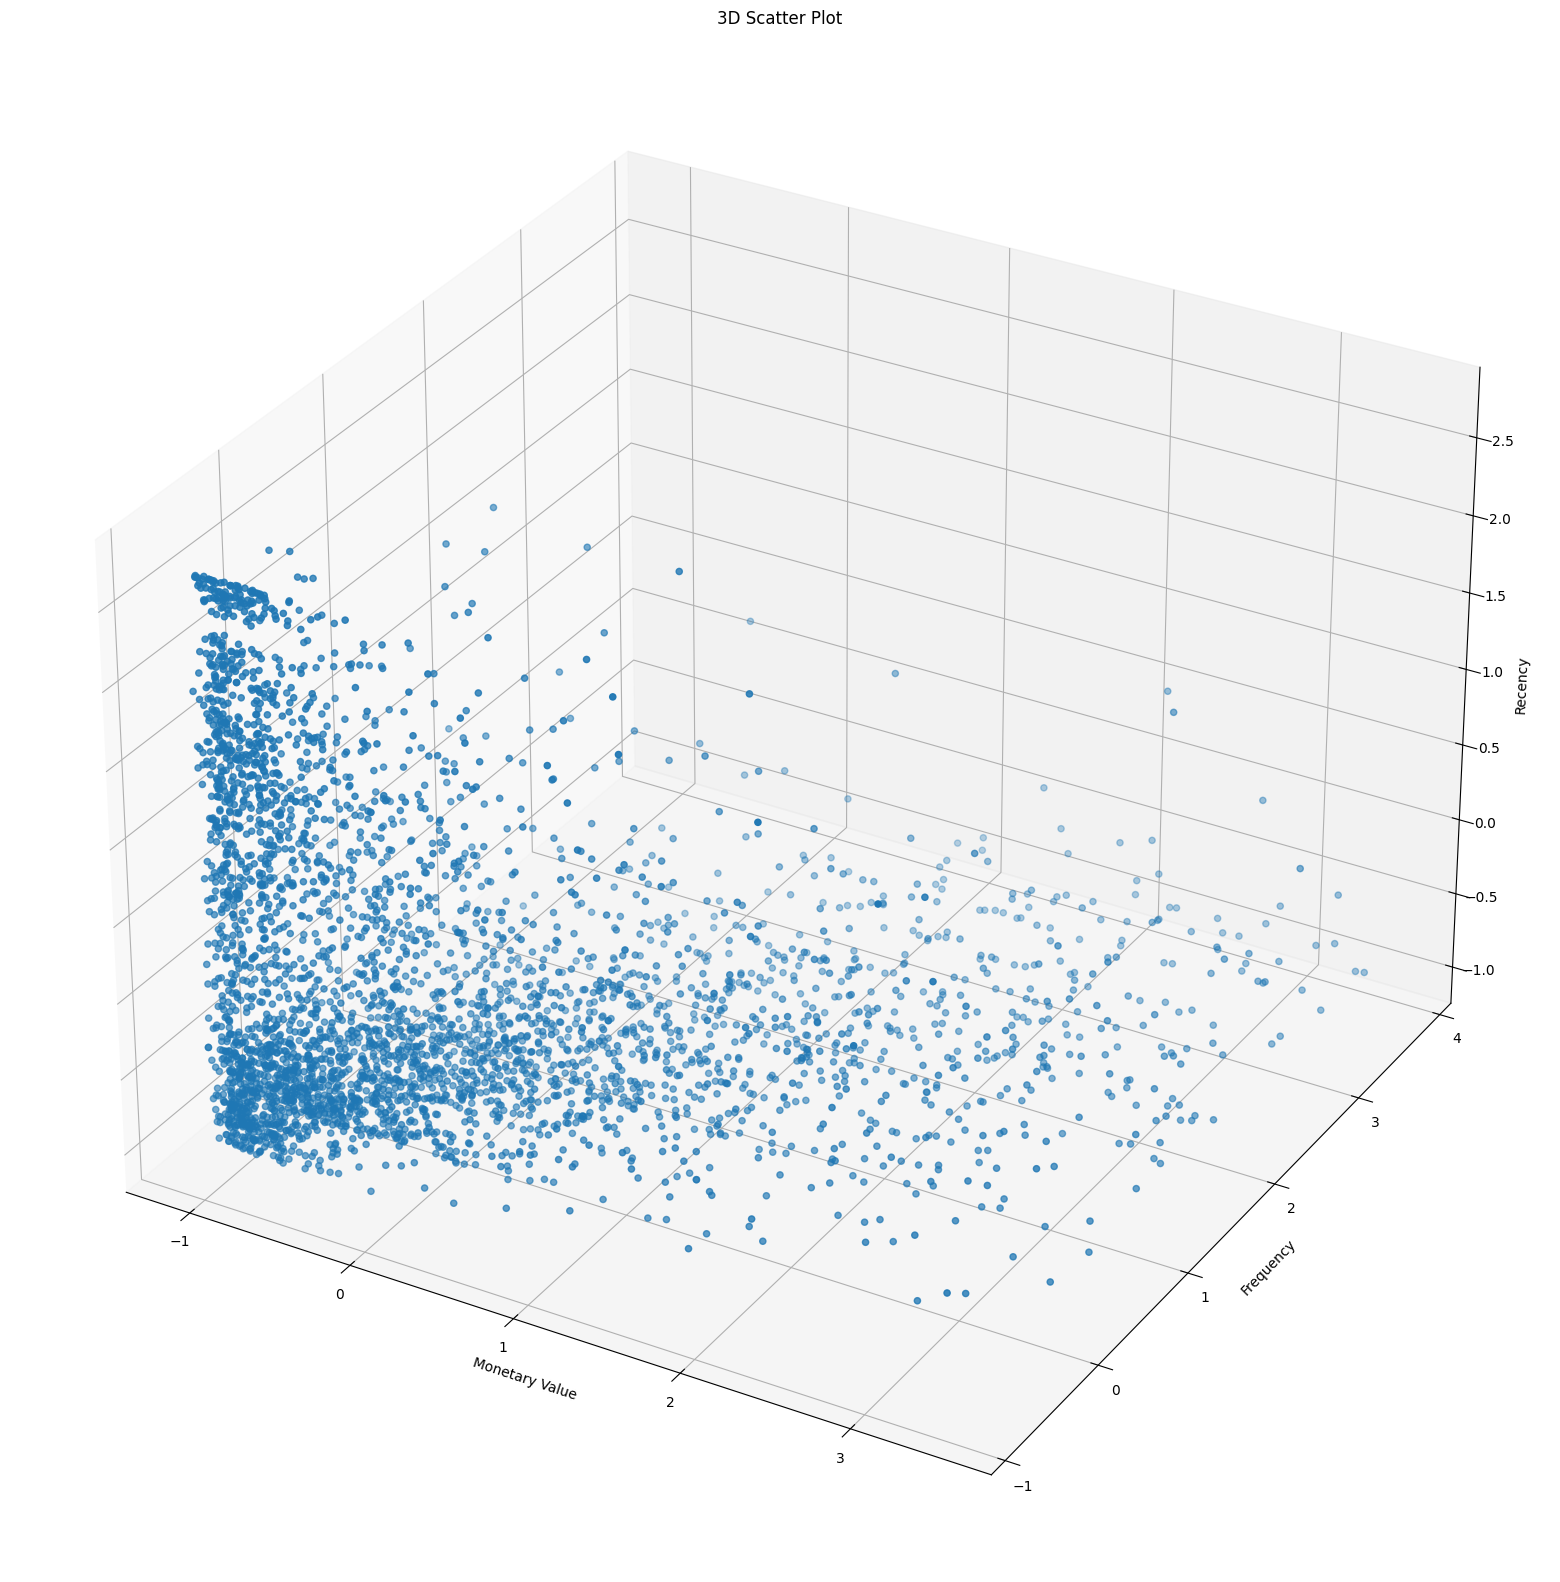

In [112]:
# 3D Scatter Plot for Customers RFM with Scaled Data

fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(projection = '3d')

ax.scatter(scaled_data_df['MonetaryValue'],scaled_data_df['Frequency'],scaled_data_df['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot')

plt.show()

# Data Clustering Via KMean Cluster 

In [113]:
# Identify best number of cluster by Inertia and Silhouet Score

k_max = 12

inertia = []

silhouet = []

k_value = range(2,k_max +1)

for k in k_value:
    
    kmean = KMeans(n_clusters= k, random_state=42, n_init='auto', max_iter= 1000)
    
    clusters = kmean.fit_predict(scaled_data_df)
    
    sil_score = silhouette_score(scaled_data_df,clusters)
    
    inertia.append(kmean.inertia_) 
    
    silhouet.append(sil_score)
    

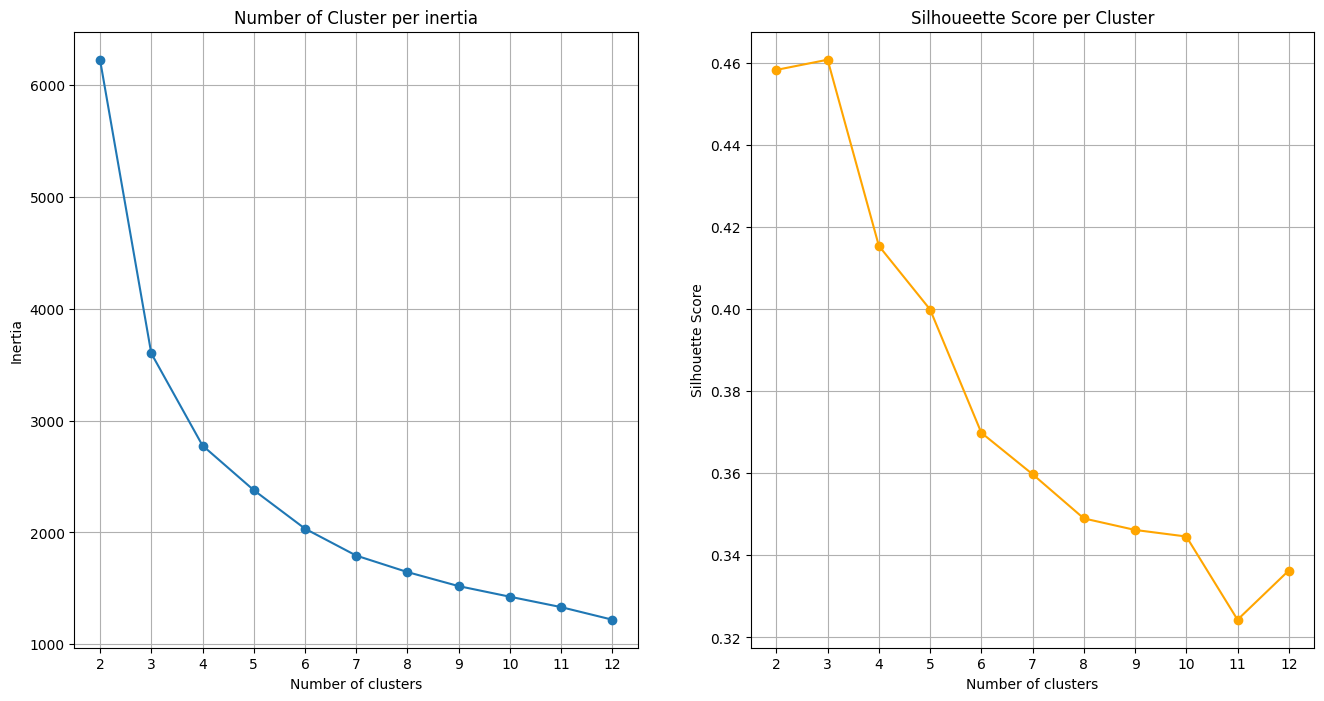

In [114]:
# Plot Line Graph for number of cluster by Inertia and Silhouet Score

plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(k_value,inertia, marker= 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Number of Cluster per inertia')

plt.xticks(k_value)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_value,silhouet, marker= 'o',color='orange')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhoueette Score per Cluster')

plt.xticks(k_value)
plt.grid(True)

plt.show()

In [115]:
# Predict the Cluster number fo each Customer

kmean = KMeans(n_clusters = 4 , random_state=42,n_init='auto' ,max_iter=1000)

Clusters = kmean.fit_predict(scaled_data_df)

Clusters

array([3, 0, 1, ..., 1, 0, 3])

In [116]:
#Create Column for each client Cluster

non_outliar_cdf['Clusters'] = Clusters

C:\Users\ABDOU\AppData\Local\Temp\ipykernel_11492\3367610643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliar_cdf['Clusters'] = Clusters


In [118]:
#check how it looks
non_outliar_cdf

,Customer ID,MonetaryValue,Frequency,LatestInvoice,Recency,Clusters
2,"12,348.00","1,437.24",4,2011-09-25 13:13:00,74,3
3,"12,349.00","1,457.55",1,2011-11-21 09:51:00,18,0
4,"12,350.00",294.40,1,2011-02-02 16:01:00,309,1
5,"12,352.00","1,385.74",7,2011-11-03 14:37:00,35,2
6,"12,353.00",89.00,1,2011-05-19 17:47:00,203,1
...,...,...,...,...,...,...
4328,"18,278.00",173.90,1,2011-09-27 11:58:00,73,0
4329,"18,280.00",180.60,1,2011-03-07 09:52:00,277,1
4330,"18,281.00",80.82,1,2011-06-12 10:53:00,180,1
4331,"18,282.00",178.05,2,2011-12-02 11:43:00,7,0


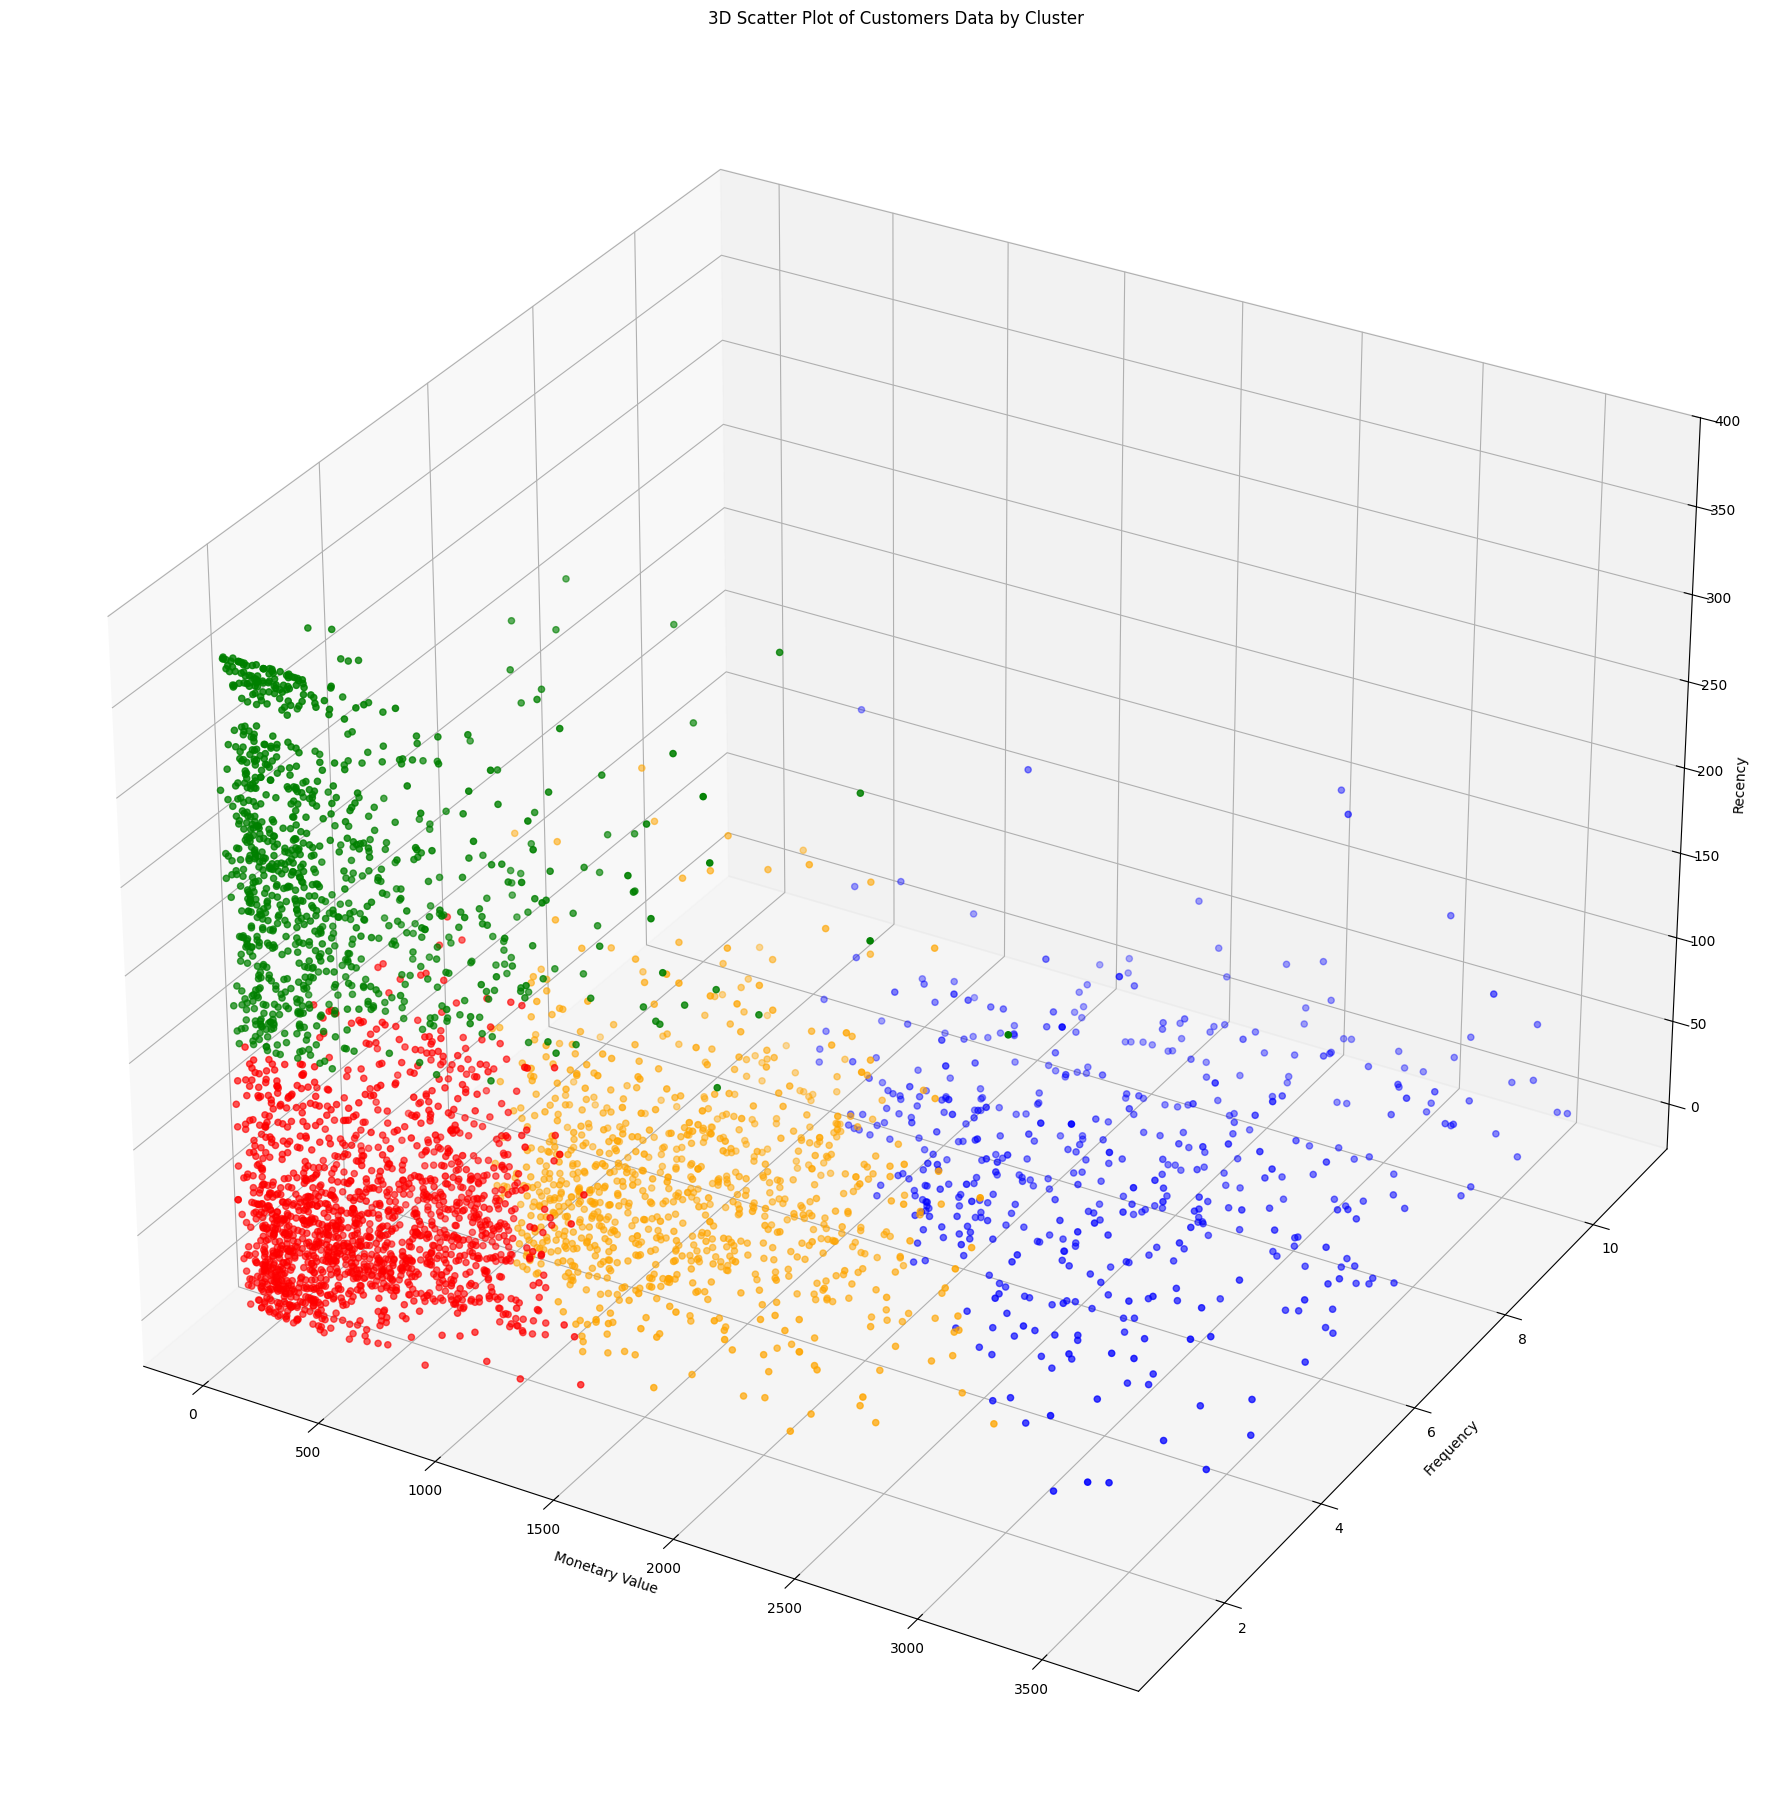

In [119]:
# 3D Scatter Plot of Customers RFM by Clusters

colors = {
                0:'red',
                1:'green',
                2:'blue',
                3:'orange',}

cluster_color = non_outliar_cdf['Clusters'].map(colors)

fig = plt.figure(figsize=(23,23))

ax = fig.add_subplot(projection = '3d')

ax.scatter(non_outliar_cdf['MonetaryValue'],non_outliar_cdf['Frequency'],non_outliar_cdf['Recency'], marker = 'o' ,c = cluster_color)

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customers Data by Cluster')

plt.show()

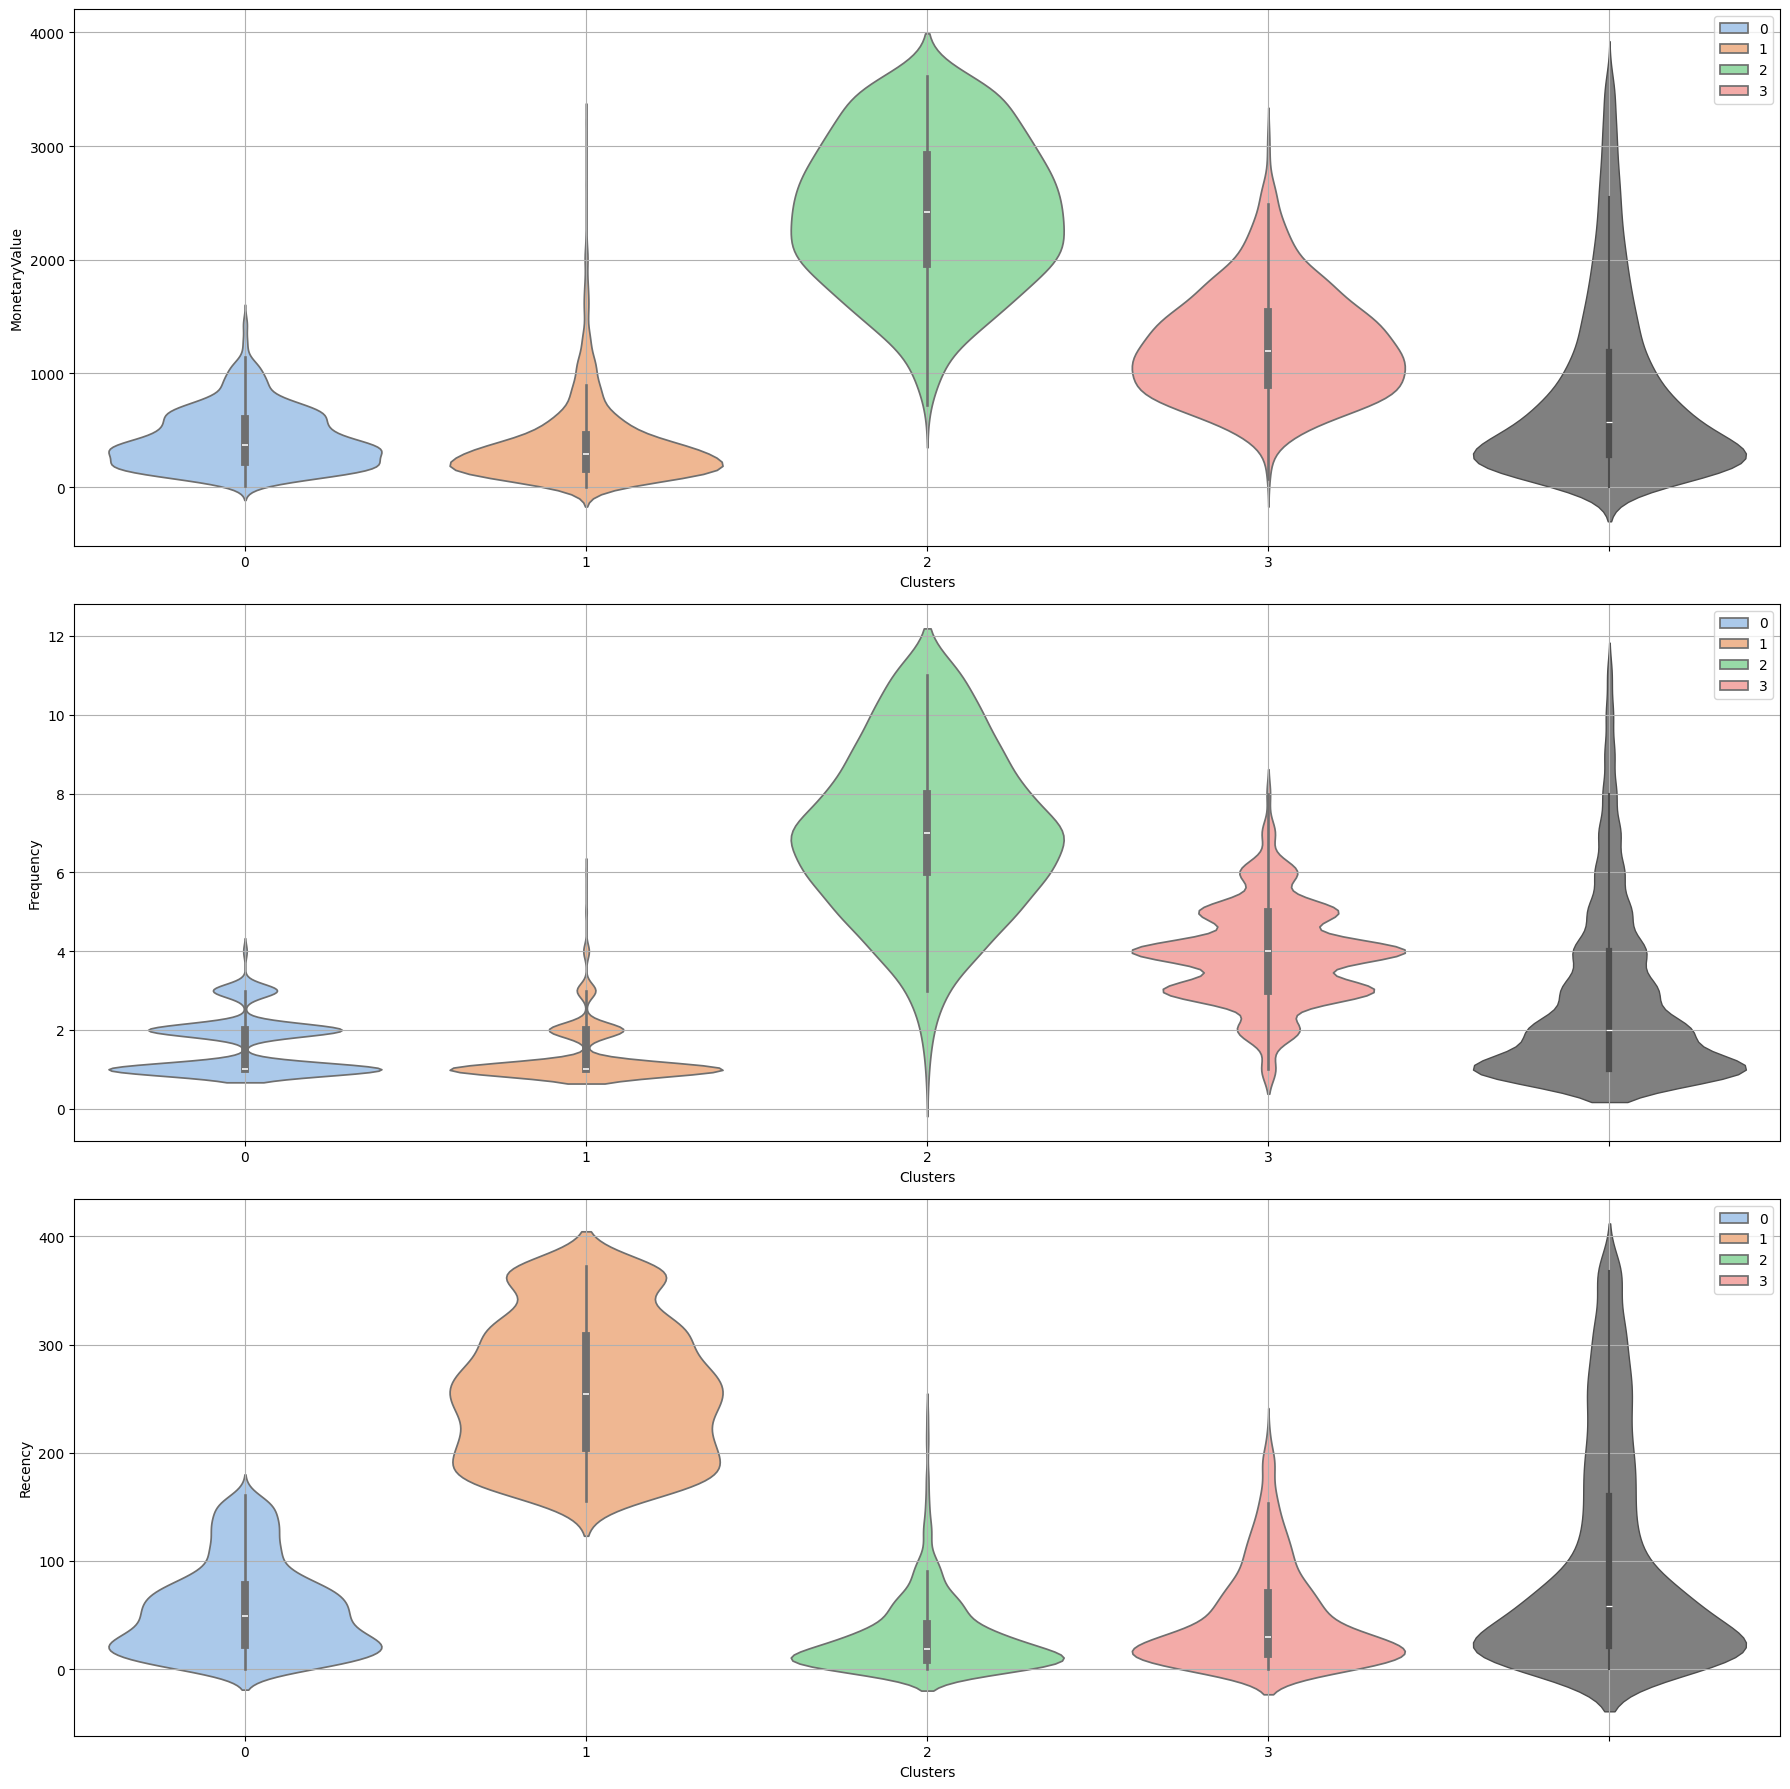

In [125]:
# Violin Plot Showcasing the performence of Clusters on each RFM Features 

plt.figure(figsize=(18,18))

# Clusters Violin Plots for Monetary Value

plt.subplot(3,1,1)
sns.violinplot(x=non_outliar_cdf['Clusters'] ,y= non_outliar_cdf['MonetaryValue'],palette= 'pastel',hue=non_outliar_cdf['Clusters'])
sns.violinplot(y=non_outliar_cdf['MonetaryValue'],color='gray',linewidth=1.0)
plt.grid()

# Clusters Violin Plot for Frequency

plt.subplot(3,1,2)
sns.violinplot(x=non_outliar_cdf['Clusters'] ,y= non_outliar_cdf['Frequency'],palette= 'pastel',hue=non_outliar_cdf['Clusters'])
sns.violinplot(y=non_outliar_cdf['Frequency'],color='gray',linewidth=1.0)
plt.grid()

# Clusters Violin Plot for Recency

plt.subplot(3,1,3)
sns.violinplot(x=non_outliar_cdf['Clusters'] ,y= non_outliar_cdf['Recency'],palette= 'pastel',hue=non_outliar_cdf['Clusters'])
sns.violinplot(y=non_outliar_cdf['Recency'],color='gray',linewidth=1.0)
plt.grid()

plt.tight_layout()
plt.show()

## Clusters Interpretation 

<b>Cluster 0 (Blue): Inactive Average Spender </b>

<b>Monetary Value:</b> Average spending, with a narrow distribution mostly at the lower end.\
<b>Frequency:</b> Average purchase frequency, a thin and flat distribution.\
<b>Recency:</b> High recency, meaning these customers have not made a purchase in a long time.

<b>Cluster 1 (Orange): "Dormant Moderate Spenders"</b>

<b>Monetary Value:</b> Moderate spending, with a slightly wider distribution.\
<b>Frequency:</b> Average frequency, indicating they don’t make purchases very often.\
<b>Recency:</b> Very high recency, meaning it has been a long time since their last purchase, unlike the previous analysis.

<b>Cluster 2 (Green): "Frequent High Spenders"</b>

<b>Monetary Value:</b> High spending, with the widest distribution and highest peaks.\
<b>Frequency:</b> High frequency, meaning these customers make purchases very often.\
<b>Recency:</b> Average recency, indicating these customers are active and have made recent purchases.

<b>Cluster 3 (Red): "Occasional Moderate Spenders"</b>

<b>Monetary Value:</b> Average to moderate spending, but with more concentration compared to Cluster 0.\
<b>Frequency:</b> Moderate frequency, suggesting they make occasional purchases.\
<b>Recency:</b> High recency, meaning they haven't made a purchase in a while


In [126]:
# Outliars Intersection betzeen Monetary Value and Frequency (index Only)

outliars_inter = monetary_outliars.index.intersection(frequency_outliars.index)
outliars_inter

Int64Index([  55,   69,   75,  100,  103,  155,  189,  223,  272,  273,
            ...
            4153, 4175, 4197, 4202, 4209, 4248, 4268, 4287, 4289, 4293],
           dtype='int64', length=232)

In [127]:
Moutliar_only = monetary_outliars.drop(outliars_inter)


In [128]:
Foutliar_only = frequency_outliars.drop(outliars_inter)


In [129]:
# Monetary and Frequency outliar intersection DataFrame by its indices

MandFoutliar = monetary_outliars.loc[outliars_inter]

In [130]:
# add number for each outliar Cluster

Moutliar_only['Clusters'] = -1
Foutliar_only['Clusters'] = -2
MandFoutliar['Clusters'] = -3

In [131]:
#Concat th outliars in one single outliars dataframe

outliars_df = pd.concat([Moutliar_only,Foutliar_only,MandFoutliar])

In [132]:
# Concat outliars and non-outliars dataframe in one Dataframe

full_clustering = pd.concat([non_outliar_cdf,outliars_df])

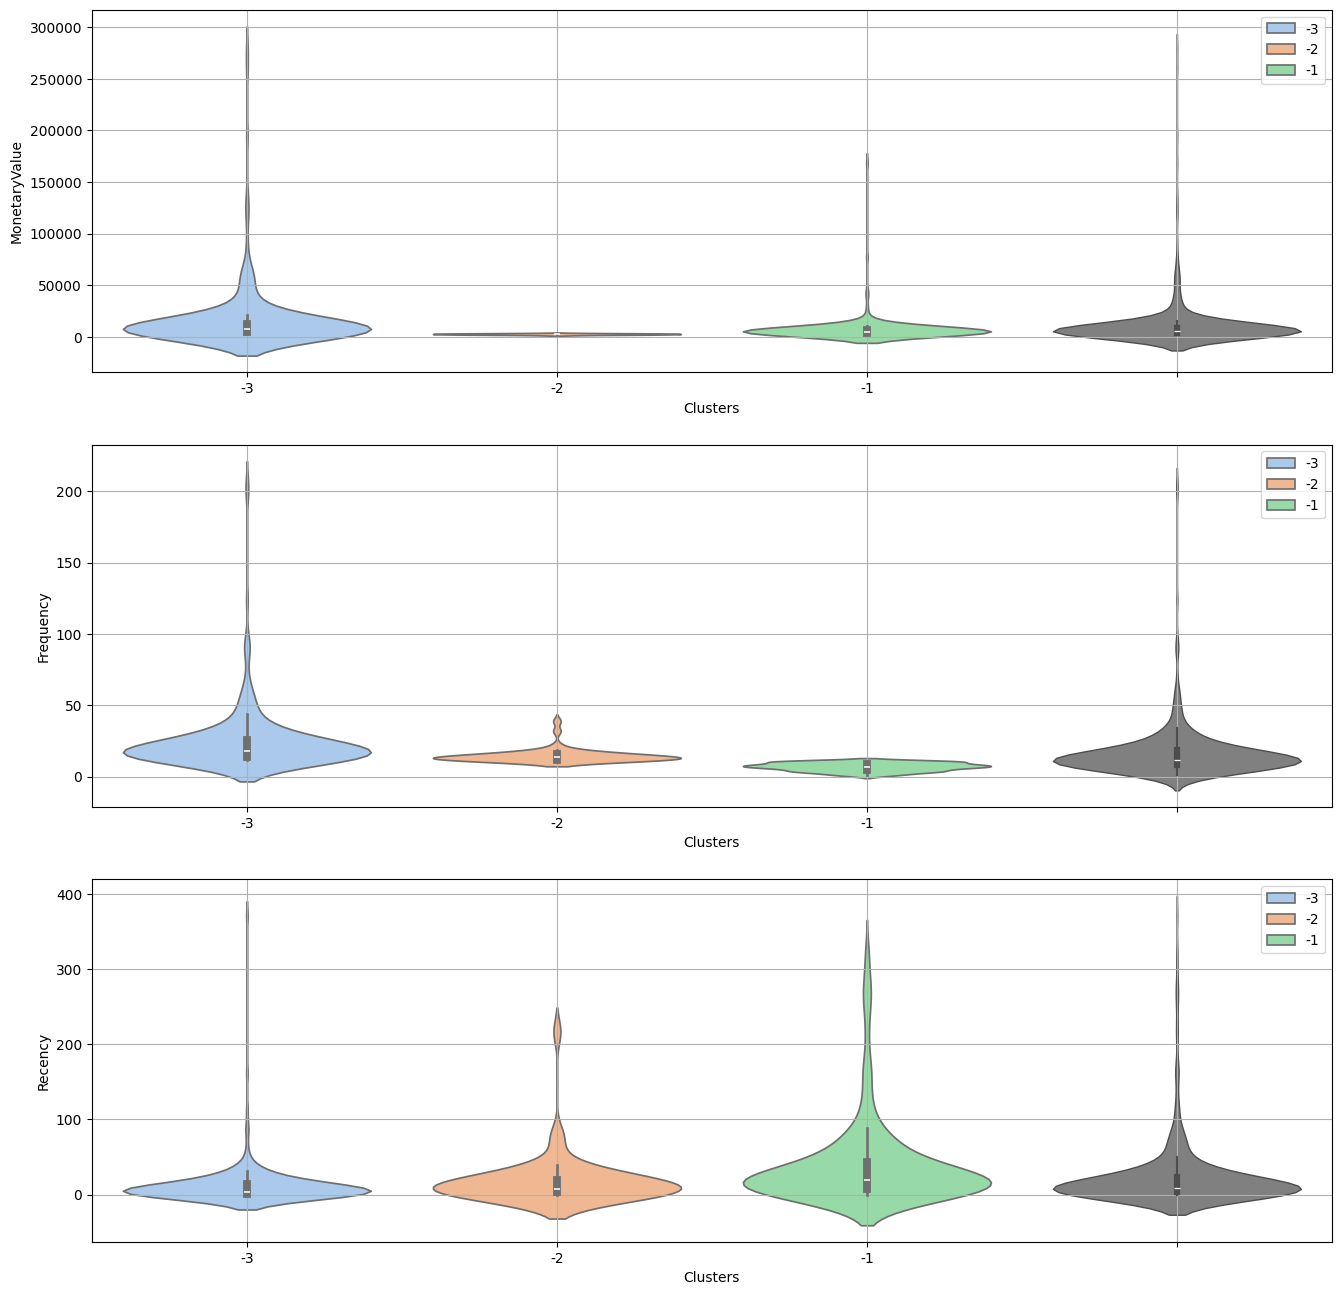

In [133]:
# Violin Plot Showcasing the performence of Clusters on outliars dataframe 

plt.figure(figsize=(16,16))

# Clusters Violin Plot for Monetary Value

plt.subplot(3,1,1)
sns.violinplot(x=outliars_df['Clusters'],y=outliars_df['MonetaryValue'],palette='pastel',hue=outliars_df['Clusters'])
sns.violinplot(y= outliars_df['MonetaryValue'],color='gray',linewidth = 1.0)
plt.grid()

# Clusters Violin Plot for Frequency

plt.subplot(3,1,2)
sns.violinplot(x=outliars_df['Clusters'],y=outliars_df['Frequency'],palette='pastel',hue=outliars_df['Clusters'])
sns.violinplot(y= outliars_df['Frequency'],color='gray',linewidth = 1.0)
plt.grid()

# Clusters Violin Plot for Recency

plt.subplot(3,1,3)
sns.violinplot(x=outliars_df['Clusters'],y=outliars_df['Recency'],palette='pastel',hue=outliars_df['Clusters'])
sns.violinplot(y= outliars_df['Recency'],color='gray',linewidth = 1.0)
plt.grid()

plt.show()

In [134]:
# Give a label name for each Cluster

Cluster_labels = {
    
    0:'RETAIN',
    1:'LAPSED',
    2:'VIP',
    3:'REWARD',
    -1:'PUMPER',
    -2:'UPSELL',
    -3:'DELIGHT',
}

In [135]:
#add Cluster Labels Column That MAP with Cluster Number

full_clustering['Cluster Label'] = full_clustering['Clusters'].map(Cluster_labels)

In [136]:
full_clustering

,Customer ID,MonetaryValue,Frequency,LatestInvoice,Recency,Clusters,Cluster Label
2,"12,348.00","1,437.24",4,2011-09-25 13:13:00,74,3,REWARD
3,"12,349.00","1,457.55",1,2011-11-21 09:51:00,18,0,RETAIN
4,"12,350.00",294.40,1,2011-02-02 16:01:00,309,1,LAPSED
5,"12,352.00","1,385.74",7,2011-11-03 14:37:00,35,2,VIP
6,"12,353.00",89.00,1,2011-05-19 17:47:00,203,1,LAPSED
...,...,...,...,...,...,...,...
4248,"18,172.00","7,561.68",20,2011-11-25 11:12:00,14,-3,DELIGHT
4268,"18,198.00","5,425.56",17,2011-12-05 14:49:00,3,-3,DELIGHT
4287,"18,223.00","6,484.54",14,2011-12-05 09:11:00,4,-3,DELIGHT
4289,"18,225.00","5,509.12",12,2011-12-06 13:27:00,2,-3,DELIGHT


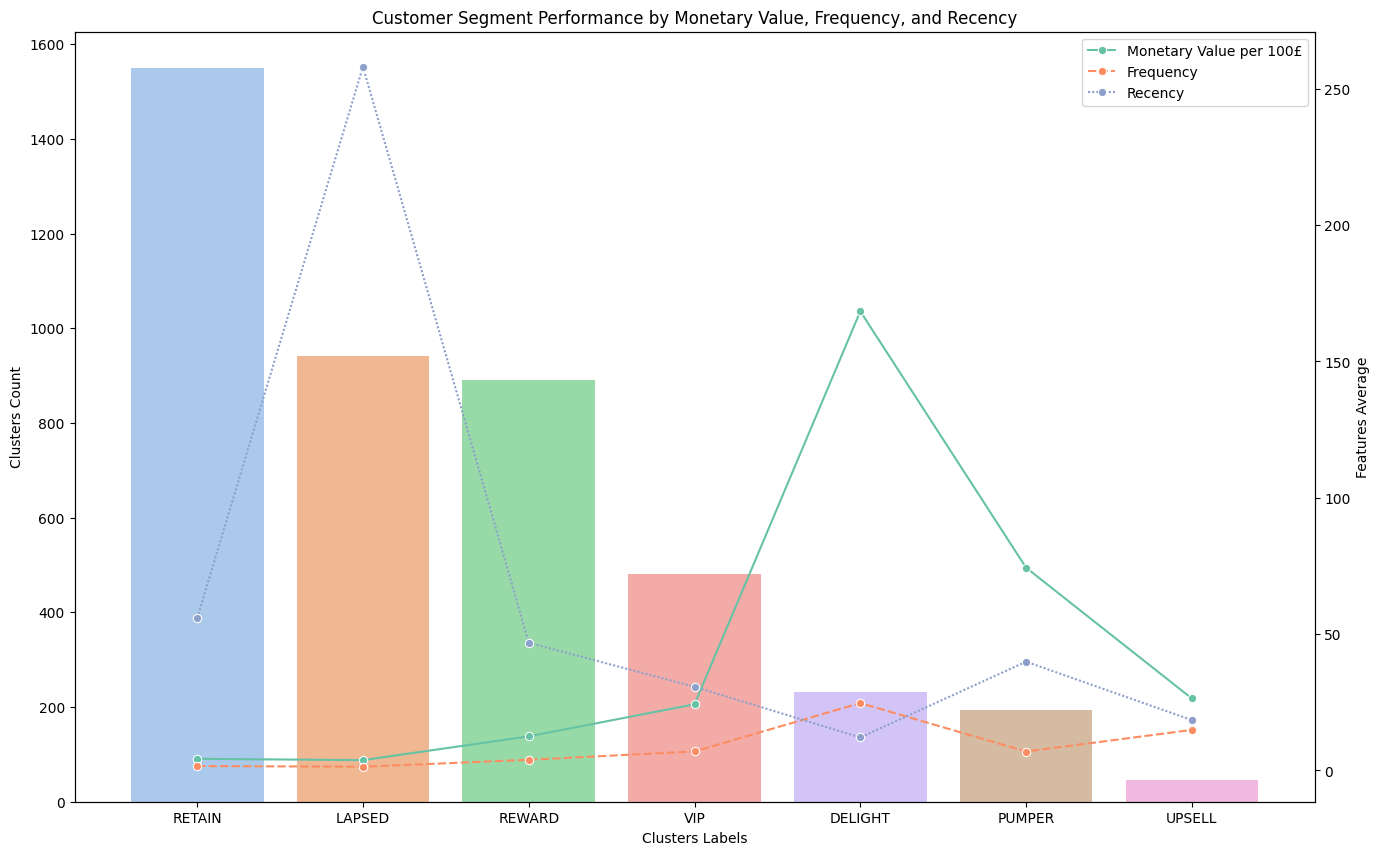

In [144]:
# Customer Segment Performance by Monetary Value, Frequency, and Recency

cluster_count = full_clustering['Cluster Label'].value_counts()

#devide Monetary value by 100£ for clear visualisation without messing with shape

full_clustering['Monetary Value per 100£'] = full_clustering['MonetaryValue']/100

Features_mean = full_clustering.groupby('Cluster Label')[['Monetary Value per 100£','Frequency','Recency']].mean()

fig,ax1 = plt.subplots(figsize=(16,10))

sns.barplot(x= cluster_count.index,ax=ax1,y= cluster_count.values,palette = 'pastel', hue = cluster_count.index)
ax1.set_ylabel('Clusters Count')
ax1.set_xlabel('Clusters Labels')


ax2= ax1.twinx()

sns.lineplot(data = Features_mean, ax=ax2, palette='Set2',marker='o' )
ax2.set_ylabel('Features Average')

plt.title('Customer Segment Performance by Monetary Value, Frequency, and Recency')
plt.show()

# Top 10 Countries

In [160]:
dfc_Top10 = df_copy.groupby('Country',as_index=False)\
.agg(
    
    TotalQuantity = ('Quantity','sum'),
    TotalIncome = ('Total per Invoice','sum'),
    TotalCustomers = ('Customer ID','nunique'),
)

In [167]:
dfc_Top10=dfc_Top10.sort_values(by='TotalIncome',ascending=False).head(10)

In [168]:
dfc_Top10.head(10)

,Country,TotalQuantity,TotalIncome,TotalCustomers
35,United Kingdom,4249507,"7,265,862.23",3916
14,Germany,118139,"205,569.89",94
13,France,110637,"183,891.68",87
30,Spain,27731,"55,725.11",30
32,Switzerland,29980,"52,441.95",21
3,Belgium,22962,"36,927.34",25
26,Portugal,16017,"26,707.95",19
12,Finland,10608,"18,344.88",12
18,Italy,8067,"15,820.24",14
1,Austria,4844,"8,742.68",11


C:\Users\ABDOU\AppData\Local\Temp\ipykernel_11492\120823155.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dfc_Top10['Country'], y=dfc_Top10['TotalIncome'], ax=ax1, palette='pastel')
C:\Users\ABDOU\AppData\Local\Temp\ipykernel_11492\120823155.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dfc_Top10['Country'], y=dfc_Top10['TotalCustomers'], ax=ax2, palette='muted', alpha=0.7)


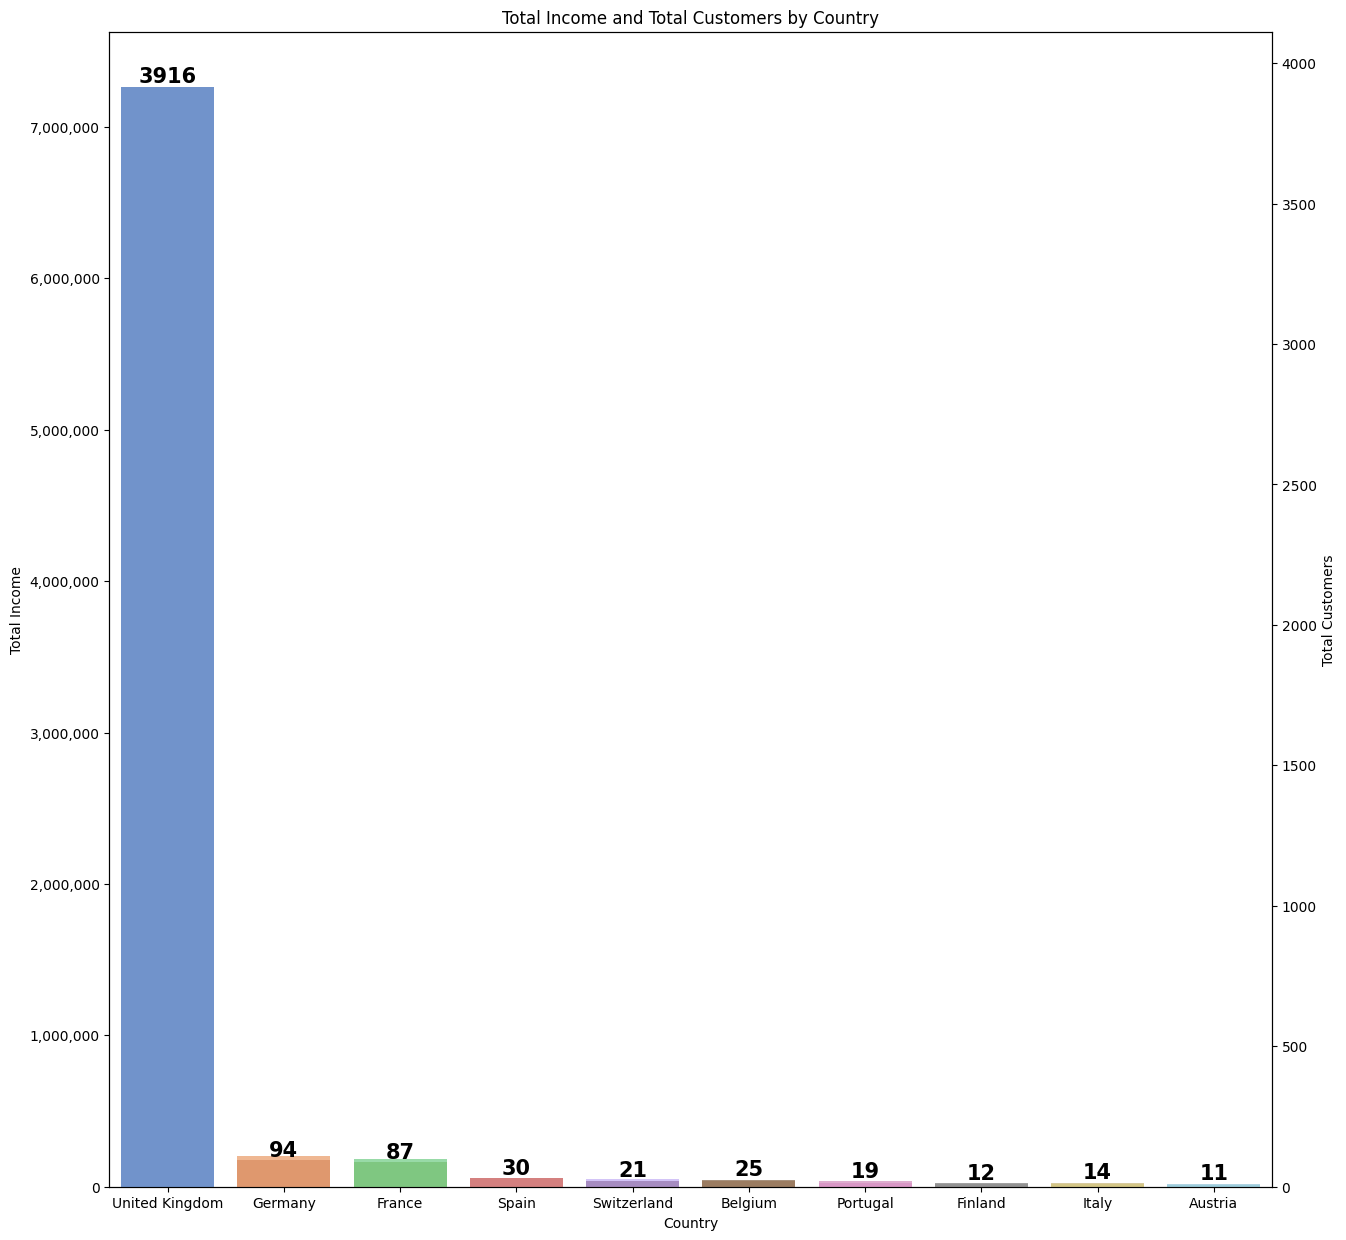

In [189]:
# Bar Plot showcast total incom per Contry and its total number of Customers

fig, ax1 = plt.subplots(figsize=(15,15))

# Plot Total Income as bar plot on the primary y-axis
sns.barplot(x=dfc_Top10['Country'], y=dfc_Top10['TotalIncome'], ax=ax1, palette='pastel')

# Create a second y-axis for Total Customers
ax2 = ax1.twinx()

# Plot Total Customers as a bar plot on the second y-axis
sns.barplot(x=dfc_Top10['Country'], y=dfc_Top10['TotalCustomers'], ax=ax2, palette='muted', alpha=0.7)

# Set labels for both axes
ax1.set_ylabel('Total Income')
ax2.set_ylabel('Total Customers')

# Set numeric formatting for the left y-axis (Total Income)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))  # Numeric format with comma

# Set title
ax1.set_title('Total Income and Total Customers by Country')

# Add Total Customers as annotations on the bar plot
for i, value in enumerate(dfc_Top10['TotalCustomers']):
    ax2.text(i, value, f'{value}', color='Black', ha='center', va='bottom', fontsize=15, fontweight='bold')

plt.show()


In [184]:
#Reforme Dataframe by Months for trends analyses

monthly_data = df_copy.resample('M', on='InvoiceDate').agg(
    total_income=('Quantity', lambda x: (x * df_copy.loc[x.index, 'Price']).sum()),
    total_customers=('Customer ID', 'nunique'),
    total_sold_quantities=('Quantity', 'sum')
).reset_index()

In [185]:
monthly_data

,InvoiceDate,total_income,total_customers,total_sold_quantities
0,2010-12-31,"567,490.72",884,311840
1,2011-01-31,"564,026.64",739,348803
2,2011-02-28,"443,346.02",757,265380
3,2011-03-31,"584,562.85",973,348164
4,2011-04-30,"455,266.91",853,291972
5,2011-05-31,"660,481.90",1054,373325
6,2011-06-30,"654,432.56",990,363410
7,2011-07-31,"592,731.90",946,369113
8,2011-08-31,"636,807.24",933,397847
9,2011-09-30,"940,900.81",1259,544070


In [186]:
monthly_data['total_income'].sum()

8761066.65

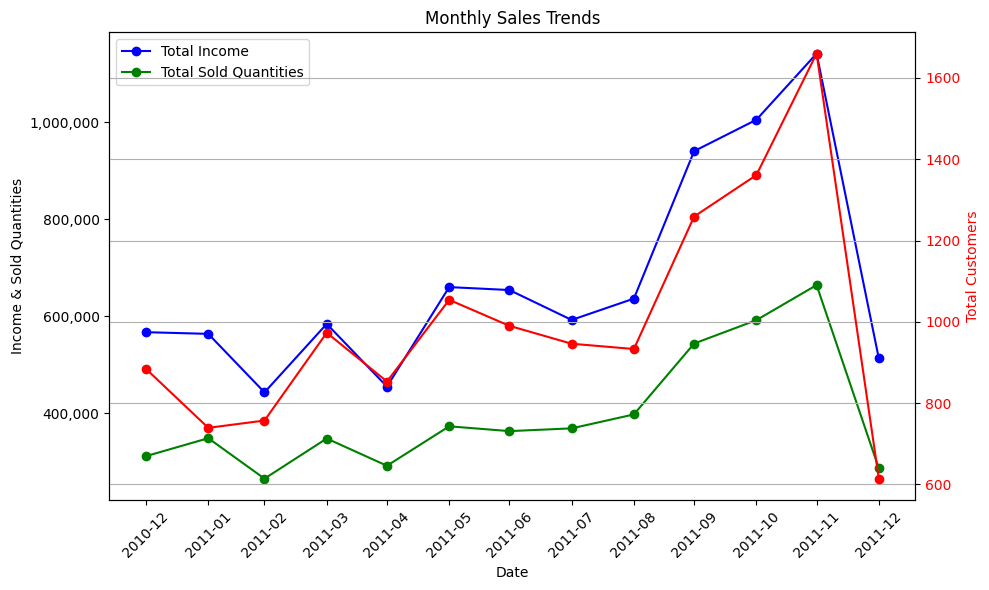

In [190]:
from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as ticker

#Monthly Sales Trends (Incoms, Quantities and Number of Customers)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Total Income and Total Sold Quantities on the primary y-axis
ax1.plot(monthly_data['InvoiceDate'], monthly_data['total_income'], label='Total Income', color='b', marker='o')
ax1.plot(monthly_data['InvoiceDate'], monthly_data['total_sold_quantities'], label='Total Sold Quantities', color='g', marker='o')
ax1.set_xlabel('Date')
ax1.set_ylabel('Income & Sold Quantities', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.legend(loc='upper left')

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))


# Create a second y-axis for Total Customers
ax2 = ax1.twinx()
ax2.plot(monthly_data['InvoiceDate'], monthly_data['total_customers'], label='Total Customers', color='r', marker='o')
ax2.set_ylabel('Total Customers', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Set x-ticks with rotation
ax1.set_xticks(monthly_data['InvoiceDate'])  # Set the ticks to the dates
ax1.set_xticklabels(monthly_data['InvoiceDate'].dt.strftime('%Y-%m'), rotation=45)  # Format and rotate labels

# Title and formatting
plt.title('Monthly Sales Trends')
plt.grid()
plt.tight_layout()
plt.show()

<b>1.General Trend:

Both total income and sold quantities show a steady upward trend from early 2011, with a sharp rise between July and November. A significant drop occurs in December 2011. Customer numbers follow a similar pattern, peaking in November and dropping sharply in December.

<b>2.Monthly Sales Performance:

<b>Highest Sales Month: </b>November 2011, with the highest income (1,142,145.77), sold quantities (664,673), and customer count (1660).
    
<b>Lowest Sales Month: </b>February 2011, with the lowest income (443,346.02) and 757 customers.
    
<b>3.Seasonal Peaks: </b>October and November show significant seasonal sales peaks, likely due to holiday shopping.

<b>4.Notable Drops: </b>A sharp drop from November to December 2011 across all metrics suggests the end of a promotional or holiday period.

<b>5.Correlation Between Customers and Income:</b> A strong correlation exists between customer numbers and total income, with customer increases leading to higher revenue, especially in October and November.


<b>Possible Actions Based on Insights:

<b>Optimize Marketing in December:</b> The steep drop in December might need intervention with post-holiday marketing campaigns to maintain customer engagement and drive sales.

<b>Leverage the Seasonal Peaks:</b> Identifying what drove the strong performance in October-November and replicating those strategies or discounts earlier in the year could boost sales.

<b>Promotional Balance:</b> Investigate the pricing strategies behind the mismatch in sales quantities and income during certain months (e.g., May 2011), ensuring that promotions or discounts still maximize revenue.

<b>Customer Retention:</b> The steep drop in December suggests that the business could benefit from customer retention strategies, such as post-holiday incentives to retain new customers from the peak season.